### Carga de librerías a utilizar

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
import re
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
import time
from datetime import datetime
import os

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#cross_val_score(XGBClassifier(), X, y)

### Carga del Dataset ya Tratado con Feature Engineering

In [3]:
dataset = pd.read_csv('DataTratada.csv', encoding = 'latin-1')
dataset = dataset.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
dataset

,Unnamed0,Tipo_Contrato,Fecha_Emision,Cliente,Nombre,Frecuencia,Articulo,Descripcion_Plan,Equipo,Serie,Precio_Total,Placas,Modelo,Chasis,Motor,Lineas,Fabricante,Tracker_Clase,Trackertipo,Color
0,0,1.0,-0.835014,-0.633904,-0.633432,0.815369,1.263747,1.261516,0.520222,-1.714266,0.703255,1.974315,-2.382229,0.117904,0.117615,-0.737816,-0.609985,-0.887152,-0.191637,-0.963818
1,1,1.0,-0.835014,-0.633904,-0.633432,-0.664239,1.101206,1.100724,0.552751,0.666859,-0.019850,1.974315,-2.382229,0.117904,0.117615,-0.737816,-0.669330,-0.887152,-0.191637,-0.971844
2,2,1.0,-0.835014,1.910509,1.910450,-0.664239,1.101206,1.100724,0.552751,1.370869,-1.021073,-0.447404,-1.258989,-0.173202,-0.173458,0.134064,1.679719,0.520448,0.122752,-0.935726
3,3,1.0,-0.835014,1.910509,1.910450,-0.664239,1.101206,1.100724,0.552751,0.911405,-1.021073,-0.447404,-1.258989,-0.173202,-0.173458,-0.771350,-0.669330,0.588193,1.631818,-0.967831
4,4,1.0,-0.835014,-0.095878,-0.095518,0.815369,1.263747,1.261516,0.520222,-0.857008,0.183064,-0.447404,0.706681,-0.173202,-0.173458,2.154478,1.679719,0.655939,0.489539,-0.911648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,2106,1.0,-1.479674,-0.454562,-0.454127,-0.664239,-1.152692,-1.128926,0.520222,-0.286011,-1.098946,-0.447404,0.706681,-0.173202,-0.173458,-0.737816,-0.323154,-1.587188,-1.239599,1.484151
2107,2107,1.0,-1.479674,-0.454562,-0.454127,-0.664239,-1.152692,-1.128926,0.520222,0.233860,-1.132320,-0.447404,-2.382229,-0.173202,-0.173458,-0.704282,-0.763292,-1.700098,-1.344395,1.484151
2108,2108,1.0,-1.479674,-0.633904,-0.633432,-0.664239,-1.185200,-1.161085,0.552751,-0.372525,-1.137882,-0.447404,0.566276,-0.173202,-0.173458,-0.771350,-0.941325,-1.444170,-0.621301,-0.474224
2109,2109,1.0,-1.479674,-0.633904,-0.633432,-0.664239,-1.206872,-1.182524,0.552751,0.186969,-1.021073,1.974315,0.004656,0.117904,0.117615,0.335267,-0.530860,0.588193,0.489539,1.484151


### Definición de las Variables

In [4]:
y = dataset['Tipo_Contrato']
X = dataset.drop(['Tipo_Contrato'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=2022)

### Entrenamiento de los Modelos de Clasificación

In [ ]:
inicio = time.time()
Nb = GridSearchCV(GaussianNB(), {'var_smoothing': [0.9]},cv=10).fit(X_train, y_train)
Log = GridSearchCV(LogisticRegression(), {'solver':['liblinear'], 'verbose':[3],'max_iter':[100]},  cv=10).fit(X_train, y_train)
LDA = GridSearchCV(LinearDiscriminantAnalysis(), {'solver':['svd','lsqr']},  cv=10).fit(X_train, y_train)
svm = GridSearchCV(SVC(), {'C': [0.1], 'kernel': ['linear']}, cv=10).fit(X_train, y_train)
randFor = GridSearchCV(RandomForestClassifier(), {'n_estimators': [20, 50, 100], 'max_depth': [10, 100, 200]}).fit(X_train, y_train)
AB = GridSearchCV(AdaBoostClassifier(),{'n_estimators': [55]},cv=10).fit(X_train, y_train)
#GB = GridSearchCV(GradientBoostingClassifier(), {'loss':['log_loss']},cv=10).fit(X_train, y_train)
TD = GridSearchCV(DecisionTreeClassifier(), {'criterion':['gini'], 'min_impurity_decrease':[0.000001], 'random_state':[2]},cv=2).fit(X_train, y_train)
QuadDA = GridSearchCV(QuadraticDiscriminantAnalysis(), {'store_covariance': ['T']},cv=10).fit(X_train, y_train)
LinearDA = GridSearchCV(LinearDiscriminantAnalysis(), {'solver': ['lsqr']},cv=2).fit(X_train, y_train)
xgb = XGBClassifier(objective="binary:logistic", random_state=42)
xgb.fit(X_train, y_train)
LGBM = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
LGBM.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
          verbose=20,eval_metric='logloss')
fin = time.time()

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

### Score de los Modelos

In [6]:
print('Naive Bayes = '+str(Nb.score(X_train,y_train)))
print('Logistica = '+str(Log.score(X_train,y_train)))
print('LDA = '+str(LDA.score(X_train,y_train)))
print('SVM = '+str(svm.score(X_train,y_train)))
print('Random Forest = '+str(randFor.score(X_train,y_train)))
print('Ada Boost = '+str(AB.score(X_train,y_train)))
print('QuadDA = '+str(QuadDA.score(X_train,y_train)))
print('LinearDA = '+str(LinearDA.score(X_train,y_train)))
#print('GB = '+str(GB.score(X,y)))
print('Tree Decision = '+str(TD.score(X_train,y_train)))
print('LGBM = {:.4f}'.format(LGBM.score(X_test,y_test)))
print('XGBoost = {:.4f}'.format(xgb.score(X_test,y_test)))

Naive Bayes = 0.5639810426540285
Logistica = 0.8415707515233581
LDA = 0.8354773188896412
SVM = 0.8456330399458362
Random Forest = 1.0
Ada Boost = 0.974272173324306
QuadDA = 0.8571428571428571
LinearDA = 0.8354773188896412
Tree Decision = 1.0
LGBM = 0.9921
XGBoost = 0.9953


### Predicciones de los Modelos

In [7]:
y_preds_NB = Nb.predict(X_test)
y_preds_Log = Log.predict(X_test)
y_preds_LDA = LDA.predict(X_test)
y_preds_svm = svm.predict(X_test)
y_preds_randFor = randFor.predict(X_test)
y_preds_QuadDA = QuadDA.predict(X_test)
y_preds_LinearDA = LinearDA.predict(X_test)
y_preds_AB = AB.predict(X_test)
y_preds_TD = TD.predict(X_test)
y_preds_LGBM = LGBM.predict(X_test)
y_preds_XGBoost = xgb.predict(X_test)

### Accuracy De las Predicciones

In [8]:
print("Accuracy NB: ", accuracy_score(y_test, y_preds_NB))
print("Accuracy Log: ", accuracy_score(y_test, y_preds_Log))
print("Accuracy LDA: ", accuracy_score(y_test, y_preds_LDA))
print("Accuracy SVM: ", accuracy_score(y_test, y_preds_svm))
print("Accuracy Random Forest: ", accuracy_score(y_test, y_preds_randFor))
print("Accuracy QuadDA: ", accuracy_score(y_test, y_preds_QuadDA))
print("Accuracy LinearDA: ", accuracy_score(y_test, y_preds_LinearDA))
print("Accuracy Ada Boost: ", accuracy_score(y_test, y_preds_AB))
print("Accuracy Tree Decition: ", accuracy_score(y_test, y_preds_TD))
print("Accuracy LGBM: ", accuracy_score(y_test, y_preds_LGBM))
print("Accuracy XGBoost: ", accuracy_score(y_test, y_preds_XGBoost))

Accuracy NB:  0.5031545741324921
Accuracy Log:  0.7981072555205048
Accuracy LDA:  0.8170347003154574
Accuracy SVM:  0.7996845425867508
Accuracy Random Forest:  0.9889589905362776
Accuracy QuadDA:  0.8769716088328076
Accuracy LinearDA:  0.8170347003154574
Accuracy Ada Boost:  0.9668769716088328
Accuracy Tree Decition:  0.973186119873817
Accuracy LGBM:  0.9921135646687698
Accuracy XGBoost:  0.9952681388012619


### Matrices de Confusión

In [9]:
conf_matrixNB = pd.crosstab(y_test, y_preds_NB, rownames=["observación"], colnames=["Predicción"])
print("Matriz de Confusión Naive Bayes: \n\n", conf_matrixNB)
conf_matrixLDA = pd.crosstab(y_test, y_preds_LDA, rownames=["observación"], colnames=["Predicción"])
print("Matriz de Confusión LDA: \n\n", conf_matrixLDA)
conf_matrixLog = pd.crosstab(y_test, y_preds_Log, rownames=["observación"], colnames=["Predicción"])
print("Matriz de Confusión Logistica: \n\n", conf_matrixLog)
conf_matrixSVM = pd.crosstab(y_test, y_preds_svm, rownames=["observación"], colnames=["Predicción"])
print("Matriz de Confusión SVM: \n\n", conf_matrixSVM)
conf_matrixrandFor = pd.crosstab(y_test, y_preds_randFor, rownames=["observación"], colnames=["Predicción"])
print("Matriz de Confusión Random Forest: \n\n", conf_matrixrandFor)
conf_matrixQuadDA = pd.crosstab(y_test, y_preds_QuadDA, rownames=["observación"], colnames=["Predicción"])
print("Matriz de Confusión Quadratic Discriminant Analisys: \n\n", conf_matrixQuadDA)
conf_matrixLinearDA = pd.crosstab(y_test, y_preds_LinearDA, rownames=["observación"], colnames=["Predicción"])
print("Matriz de Confusión Linear Discriminant Analisys: \n\n", conf_matrixLinearDA)
conf_matrixAB = pd.crosstab(y_test, y_preds_AB, rownames=["observación"], colnames=["Predicción"])
print("Matriz de Confusión Ada Boost: \n\n", conf_matrixAB)
conf_matrixTD = pd.crosstab(y_test, y_preds_TD, rownames=["observación"], colnames=["Predicción"])
print("Matriz de Confusión Tree Decision: \n\n", conf_matrixTD)
conf_matrixLGBM = pd.crosstab(y_test, y_preds_LGBM, rownames=["observación"], colnames=["Predicción"])
print("Matriz de Confusión LGBM: \n\n", conf_matrixLGBM)
conf_matrixXGBoost = pd.crosstab(y_test, y_preds_XGBoost, rownames=["observación"], colnames=["Predicción"])
print("Matriz de Confusión XGBoost: \n\n", conf_matrixXGBoost)

Matriz de Confusión Naive Bayes: 

 Predicción   0.0  1.0
observación          
0.0          256   60
1.0          255   63
Matriz de Confusión LDA: 

 Predicción   0.0  1.0
observación          
0.0          253   63
1.0           53  265
Matriz de Confusión Logistica: 

 Predicción   0.0  1.0
observación          
0.0          255   61
1.0           67  251
Matriz de Confusión SVM: 

 Predicción   0.0  1.0
observación          
0.0          258   58
1.0           69  249
Matriz de Confusión Random Forest: 

 Predicción   0.0  1.0
observación          
0.0          311    5
1.0            2  316
Matriz de Confusión Quadratic Discriminant Analisys: 

 Predicción   0.0  1.0
observación          
0.0          240   76
1.0            2  316
Matriz de Confusión Linear Discriminant Analisys: 

 Predicción   0.0  1.0
observación          
0.0          253   63
1.0           53  265
Matriz de Confusión Ada Boost: 

 Predicción   0.0  1.0
observación          
0.0          308    8
1.0        

### **ROC (Receiver Operating Characteristics) & AUC (Area under de curve)**

In [10]:
print('ROC-AUC -> NB = ', roc_auc_score(y_test, y_preds_NB, multi_class='ovr'))
print('ROC-AUC -> Log = ', roc_auc_score(y_test, y_preds_Log, multi_class='ovo'))
print('ROC-AUC -> LDA = ', roc_auc_score(y_test, y_preds_LDA, multi_class='ovo'))
print('ROC-AUC -> Tree Decision = ', roc_auc_score(y_test, y_preds_TD, multi_class='ovo'))
print('ROC-AUC -> SVM = ', roc_auc_score(y_test, y_preds_svm, multi_class='ovo'))
print('ROC-AUC -> Random Forest = ', roc_auc_score(y_test, y_preds_randFor, multi_class='ovo'))
print('ROC-AUC -> QuadDA = ', roc_auc_score(y_test, y_preds_QuadDA, multi_class='ovo'))
print('ROC-AUC -> LinearDA = ', roc_auc_score(y_test, y_preds_LinearDA, multi_class='ovo'))
print('ROC-AUC -> Ada Boost = ', roc_auc_score(y_test, y_preds_AB, multi_class='ovo'))
print('ROC-AUC -> LGBM = ', roc_auc_score(y_test, y_preds_LGBM, multi_class='ovo'))
print('ROC-AUC -> XGBoost = ', roc_auc_score(y_test, y_preds_XGBoost, multi_class='ovo'))

ROC-AUC -> NB =  0.5041198949128255
ROC-AUC -> Log =  0.7981351007085423
ROC-AUC -> LDA =  0.8169831223628693
ROC-AUC -> Tree Decision =  0.9731908287556723
ROC-AUC -> SVM =  0.79973728206353
ROC-AUC -> Random Forest =  0.9889439535068865
ROC-AUC -> QuadDA =  0.8766021813549877
ROC-AUC -> LinearDA =  0.8169831223628693
ROC-AUC -> Ada Boost =  0.9669015205795717
ROC-AUC -> LGBM =  0.9921284133428867
ROC-AUC -> XGBoost =  0.995273067430937


### Curva ROC AUC

In [11]:
svm_prob, svm_prob_v, _ = roc_curve(y_test, y_preds_svm)
nb_prob, nb_prob_v, _ = roc_curve(y_test, y_preds_NB)
tree_prob, tree_prob_v, _ = roc_curve(y_test, y_preds_TD)
log_prob, log_prob_v, _ = roc_curve(y_test, y_preds_Log)
lgb_prob, lgb_prob_v, _ = roc_curve(y_test, y_preds_LGBM)
xgb_prob, xgb_prob_v, _ = roc_curve(y_test, y_preds_XGBoost)

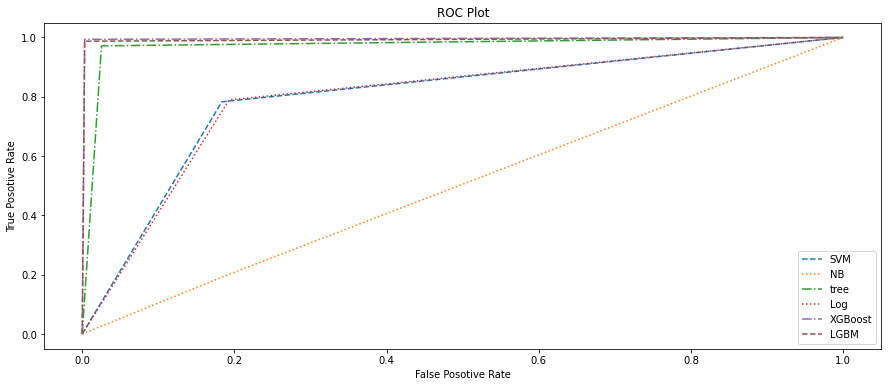

In [12]:
plt.figure(figsize = (15,6))
plt.plot(svm_prob, svm_prob_v, linestyle="--", label="SVM")
plt.plot(nb_prob, nb_prob_v, linestyle=':', label="NB")
plt.plot(tree_prob, tree_prob_v, linestyle='-.', label="tree")
plt.plot(log_prob, log_prob_v, linestyle='dotted', label="Log")
plt.plot(xgb_prob, xgb_prob_v, linestyle='dashdot', label="XGBoost")
plt.plot(lgb_prob, lgb_prob_v, linestyle='dashed', label="LGBM")

plt.title("ROC Plot")
plt.xlabel("False Posotive Rate")
plt.ylabel("True Posotive Rate")
plt.legend()
plt.show()

### Selección del Mejor Modelo y Generación del CSV con Predicciones

In [13]:
list = [roc_auc_score(y_test, y_preds_NB, multi_class='ovr'), roc_auc_score(y_test, y_preds_Log, multi_class='ovo'),roc_auc_score(y_test, y_preds_LDA, multi_class='ovo'),roc_auc_score(y_test, y_preds_TD, multi_class='ovo'),roc_auc_score(y_test, y_preds_svm, multi_class='ovo'),roc_auc_score(y_test, y_preds_randFor, multi_class='ovo'),roc_auc_score(y_test, y_preds_QuadDA, multi_class='ovo'),roc_auc_score(y_test, y_preds_LinearDA, multi_class='ovo'),roc_auc_score(y_test, y_preds_AB, multi_class='ovo'),roc_auc_score(y_test, y_preds_LGBM, multi_class='ovo'),roc_auc_score(y_test, y_preds_XGBoost, multi_class='ovo')]
mejor = max(list)
pos = list.index(mejor)

if list.index(mejor) == 0:
    print("El mejor moodelo es Naive Bayes")
    TP = conf_matrixNB.iloc[1,1]
    TN = conf_matrixNB.iloc[0,0]
    FN = conf_matrixNB.iloc[1,0]
    FP = conf_matrixNB.iloc[0,1]
    print("Exactitud: ", (TP+TN)/(TP+TP+TN+TN))
    print("Precision: ", TP/(TP+TP) )
    print("Sensitividad: ", TP/(TP+FN))
    print("Especificidad: ", TN/(TN+FP))
    print("ROC AUC: ",roc_auc_score(y_test, y_preds_NB, multi_class='ovr'))
    print('El tiempo de entrenamiento de modelos tardo: ',fin-inicio)
    print('Fecha y hora de ejecución: ',datetime.today().strftime('%Y-%m-%d %H:%M'))
    df = pd.DataFrame(y_preds_NB)
    df.to_csv("Predicciones.csv", encoding = 'UTF-8')
    file = open("Ejecucion.txt", "w")
    file.write("El mejor moodelo es Naive Bayes" + os.linesep)
    file.write("Exactitud: "+ str((TP+TN)/(TP+TP+TN+TN)) + os.linesep)
    file.write("Precision: "+ str(TP/(TP+TP)) + os.linesep)
    file.write("Sensitividad: "+ str(TP/(TP+FN)) + os.linesep)
    file.write("Especificidad: "+ str(TN/(TN+FP)) + os.linesep)
    file.write("ROC-AUC Naive Bayes = " +str(roc_auc_score(y_test, y_preds_NB, multi_class='ovo')) + os.linesep)
    file.write('El tiempo de entrenamiento de modelos tardo: '+str(fin-inicio) + os.linesep)
    file.write('Fecha y hora de ejecución: '+datetime.today().strftime('%Y-%m-%d %H:%M'))
    file.close()

elif list.index(mejor) == 1:
    print("El mejor moodelo es Logistica")
    TP = conf_matrixLog.iloc[1,1]
    TN = conf_matrixLog.iloc[0,0]
    FN = conf_matrixLog.iloc[1,0]
    FP = conf_matrixLog.iloc[0,1]
    print("Exactitud: ", (TP+TN)/(TP+TP+TN+TN))
    print("Precision: ", TP/(TP+TP) )
    print("Sensitividad: ", TP/(TP+FN))
    print("Especificidad: ", TN/(TN+FP))
    print("ROC AUC: ",roc_auc_score(y_test, y_preds_Log, multi_class='ovr'))
    print('El tiempo de entrenamiento de modelos tardo: ',fin-inicio)
    print('Fecha y hora de ejecución: ',datetime.today().strftime('%Y-%m-%d %H:%M'))
    df = pd.DataFrame(y_preds_Log)
    df.to_csv("Predicciones.csv", encoding = 'UTF-8')
    file = open("Ejecucion.txt", "w")
    file.write("El mejor moodelo es Logistica" + os.linesep)
    file.write("Exactitud: "+ str((TP+TN)/(TP+TP+TN+TN)) + os.linesep)
    file.write("Precision: "+ str(TP/(TP+TP)) + os.linesep)
    file.write("Sensitividad: "+ str(TP/(TP+FN)) + os.linesep)
    file.write("Especificidad: "+ str(TN/(TN+FP)) + os.linesep)
    file.write("ROC-AUC Logistica = " +str(roc_auc_score(y_test, y_preds_Log, multi_class='ovo')) + os.linesep)
    file.write('El tiempo de entrenamiento de modelos tardo: '+str(fin-inicio) + os.linesep)
    file.write('Fecha y hora de ejecución: '+datetime.today().strftime('%Y-%m-%d %H:%M'))
    file.close()


elif list.index(mejor) == 2:
    print("El mejor moodelo es LDA")
    TP = conf_matrixLDA.iloc[1,1]
    TN = conf_matrixLDA.iloc[0,0]
    FN = conf_matrixLDA.iloc[1,0]
    FP = conf_matrixLDA.iloc[0,1]
    print("Exactitud: ", (TP+TN)/(TP+TP+TN+TN))
    print("Precision: ", TP/(TP+TP) )
    print("Sensitividad: ", TP/(TP+FN))
    print("Especificidad: ", TN/(TN+FP))
    print("ROC AUC: ",roc_auc_score(y_test, y_preds_LDA, multi_class='ovr'))
    print('El tiempo de entrenamiento de modelos tardo: ',fin-inicio)
    print('Fecha y hora de ejecución: ',datetime.today().strftime('%Y-%m-%d %H:%M'))
    df = pd.DataFrame(y_preds_LDA)
    df.to_csv("Predicciones.csv", encoding = 'UTF-8')
    file = open("Ejecucion.txt", "w")
    file.write("El mejor moodelo es LDA" + os.linesep)
    file.write("Exactitud: "+ str((TP+TN)/(TP+TP+TN+TN)) + os.linesep)
    file.write("Precision: "+ str(TP/(TP+TP)) + os.linesep)
    file.write("Sensitividad: "+ str(TP/(TP+FN)) + os.linesep)
    file.write("Especificidad: "+ TN/(TN+FP) + os.linesep)
    file.write("ROC-AUC LDA = " +str(roc_auc_score(y_test, y_preds_LDA, multi_class='ovo')) + os.linesep)
    file.write('El tiempo de entrenamiento de modelos tardo: '+str(fin-inicio) + os.linesep)
    file.write('Fecha y hora de ejecución: '+datetime.today().strftime('%Y-%m-%d %H:%M'))
    file.close()

elif list.index(mejor) == 3:
    print("El mejor moodelo es Tree Decision")
    TP = conf_matrixTD.iloc[1,1]
    TN = conf_matrixTD.iloc[0,0]
    FN = conf_matrixTD.iloc[1,0]
    FP = conf_matrixTD.iloc[0,1]
    print("Exactitud: ", (TP+TN)/(TP+TP+TN+TN))
    print("Precision: ", TP/(TP+TP) )
    print("Sensitividad: ", TP/(TP+FN))
    print("Especificidad: ", TN/(TN+FP))
    print("ROC AUC: ",roc_auc_score(y_test, y_preds_TD, multi_class='ovr'))
    print('El tiempo de entrenamiento de modelos tardo: ',fin-inicio)
    print('Fecha y hora de ejecución: ',datetime.today().strftime('%Y-%m-%d %H:%M'))
    df = pd.DataFrame(y_preds_TD)
    df.to_csv("Predicciones.csv", encoding = 'UTF-8')
    file = open("Ejecucion.txt", "w")
    file.write("El mejor moodelo es Tree Decision" + os.linesep)
    file.write("Exactitud: "+ str((TP+TN)/(TP+TP+TN+TN)) + os.linesep)
    file.write("Precision: "+ str(TP/(TP+TP)) + os.linesep)
    file.write("Sensitividad: "+ str(TP/(TP+FN)) + os.linesep)
    file.write("Especificidad: "+ str(TN/(TN+FP)) + os.linesep)
    file.write("ROC-AUC Tree Decision = " +str(roc_auc_score(y_test, y_preds_TD, multi_class='ovo')) + os.linesep)
    file.write('El tiempo de entrenamiento de modelos tardo: '+str(fin-inicio) + os.linesep)
    file.write('Fecha y hora de ejecución: '+datetime.today().strftime('%Y-%m-%d %H:%M'))
    file.close()

elif list.index(mejor) == 4:
    print("El mejor moodelo es SVM")
    TP = conf_matrixSVM.iloc[1,1]
    TN = conf_matrixSVM.iloc[0,0]
    FN = conf_matrixSVM.iloc[1,0]
    FP = conf_matrixSVM.iloc[0,1]
    print("Exactitud: ", (TP+TN)/(TP+TP+TN+TN))
    print("Precisio: ", TP/(TP+TP) )
    print("Sensitividad: ", TP/(TP+FN))
    print("Especificidad: ", TN/(TN+FP))
    print("ROC AUC: ",roc_auc_score(y_test, y_preds_SVM, multi_class='ovr'))
    print('El tiempo de entrenamiento de modelos tardo: '+str(fin-inicio))
    print('Fecha y hora de ejecución: ',datetime.today().strftime('%Y-%m-%d %H:%M'))
    df = pd.DataFrame(y_preds_SVM)
    df.to_csv("Predicciones.csv", encoding = 'UTF-8')
    file = open("Ejecucion.txt", "w")
    file.write("El mejor moodelo es SVM" + os.linesep)
    file.write("Exactitud: "+ str((TP+TN)/(TP+TP+TN+TN)) + os.linesep)
    file.write("Precision: "+ str(TP/(TP+TP)) + os.linesep)
    file.write("Sensitividad: "+ str(TP/(TP+FN)) + os.linesep)
    file.write("Especificidad: "+ str(TN/(TN+FP)) + os.linesep)
    file.write("ROC-AUC SVM = " +str(roc_auc_score(y_test, y_preds_SVM, multi_class='ovo')) + os.linesep)
    file.write('El tiempo de entrenamiento de modelos tardo: '+str(fin-inicio) + os.linesep)
    file.write('Fecha y hora de ejecución: '+datetime.today().strftime('%Y-%m-%d %H:%M'))
    file.close()
    
elif list.index(mejor) == 5:
    print("El mejor moodelo es  Random Forest")
    TP = conf_matrixrandFor.iloc[1,1]
    TN = conf_matrixrandFor.iloc[0,0]
    FN = conf_matrixrandFor.iloc[1,0]
    FP = conf_matrixrandFor.iloc[0,1]
    print("Exactitud: ", (TP+TN)/(TP+TP+TN+TN))
    print("Precision: ", TP/(TP+TP) )
    print("Sensitividad: ", TP/(TP+FN))
    print("Especificidad: ", TN/(TN+FP))
    print("ROC AUC: ",roc_auc_score(y_test, y_preds_randFor, multi_class='ovr'))
    print('El tiempo de entrenamiento de modelos tardo: '+str(fin-inicio))
    print('Fecha y hora de ejecución: '+datetime.today().strftime('%Y-%m-%d %H:%M'))
    df = pd.DataFrame(y_preds_randFor)
    df.to_csv("Predicciones.csv", encoding = 'UTF-8')
    file = open("Ejecucion.txt", "w")
    file.write("El mejor moodelo es Random Forest" + os.linesep)
    file.write("Exactitud: "+ str((TP+TN)/(TP+TP+TN+TN)) + os.linesep)
    file.write("Precision: "+ str(TP/(TP+TP)) + os.linesep)
    file.write("Sensitividad: "+ str(TP/(TP+FN)) + os.linesep)
    file.write("Especificidad: "+ str(TN/(TN+FP)) + os.linesep)
    file.write("ROC-AUC Random Forest = " +str(roc_auc_score(y_test, y_preds_randFor, multi_class='ovo')) + os.linesep)
    file.write('El tiempo de entrenamiento de modelos tardo: '+str(fin-inicio) + os.linesep)
    file.write('Fecha y hora de ejecución: '+datetime.today().strftime('%Y-%m-%d %H:%M'))
    file.close()

elif list.index(mejor) == 6:
    print("El mejor moodelo es  Quadratic Discriminant Analisys")
    TP = conf_matrixQuadDA.iloc[1,1]
    TN = conf_matrixQuadDA.iloc[0,0]
    FN = conf_matrixQuadDA.iloc[1,0]
    FP = conf_matrixQuadDA.iloc[0,1]
    print("Exactitud: ", (TP+TN)/(TP+TP+TN+TN))
    print("Precision: ", TP/(TP+TP) )
    print("Sensitividad: ", TP/(TP+FN))
    print("Especificidad: ", TN/(TN+FP))
    print("ROC AUC: ",roc_auc_score(y_test, y_preds_QuadDA, multi_class='ovr'))
    print('El tiempo de entrenamiento de modelos tardo: ',fin-inicio)
    print('Fecha y hora de ejecución: ',datetime.today().strftime('%Y-%m-%d %H:%M'))
    df = pd.DataFrame(y_preds_QuadDA)
    df.to_csv("Predicciones.csv", encoding = 'UTF-8')
    file = open("Ejecucion.txt", "w")
    file.write("El mejor moodelo es Quadratic Discriminant Analisys" + os.linesep)
    file.write("Exactitud: "+ str((TP+TN)/(TP+TP+TN+TN)) + os.linesep)
    file.write("Precision: "+ str(TP/(TP+TP)) + os.linesep)
    file.write("Sensitividad: "+ str(TP/(TP+FN)) + os.linesep)
    file.write("Especificidad: "+ str(TN/(TN+FP)) + os.linesep)
    file.write("ROC-AUC Quadratic Discriminant Analisys = " +str(roc_auc_score(y_test, y_preds_y_preds_QuadDA, multi_class='ovo')) + os.linesep)
    file.write('El tiempo de entrenamiento de modelos tardo: '+str(fin-inicio) + os.linesep)
    file.write('Fecha y hora de ejecución: '+datetime.today().strftime('%Y-%m-%d %H:%M'))
    file.close()

elif list.index(mejor) == 7:
    print("El mejor moodelo es  Linear Discriminant Analisys")
    TP = conf_matrixLinearDA.iloc[1,1]
    TN = conf_matrixLinearDA.iloc[0,0]
    FN = conf_matrixLinearDA.iloc[1,0]
    FP = conf_matrixLinearDA.iloc[0,1]
    print("Exactitud: ", (TP+TN)/(TP+TP+TN+TN))
    print("Precision: ", TP/(TP+TP) )
    print("Sensitividad: ", TP/(TP+FN))
    print("Especificidad: ", TN/(TN+FP))
    print("ROC AUC: ",roc_auc_score(y_test, y_preds_LinearDA, multi_class='ovr'))
    print('El tiempo de entrenamiento de modelos tardo: ',fin-inicio)
    print('Fecha y hora de ejecución: ',datetime.today().strftime('%Y-%m-%d %H:%M'))
    df = pd.DataFrame(y_preds_LinearDA)
    df.to_csv("Predicciones.csv", encoding = 'UTF-8')
    file = open("Ejecucion.txt", "w")
    file.write("El mejor moodelo es Linear Discriminant Analisys" + os.linesep)
    file.write("Exactitud: "+ str((TP+TN)/(TP+TP+TN+TN)) + os.linesep)
    file.write("Precision: "+ str(TP/(TP+TP)) + os.linesep)
    file.write("Sensitividad: "+ str(TP/(TP+FN)) + os.linesep)
    file.write("Especificidad: "+ str(TN/(TN+FP)) + os.linesep)
    file.write("ROC-AUC Linear Discriminant Analisys = " +str(roc_auc_score(y_test, y_preds_y_preds_LinearDA, multi_class='ovo')) + os.linesep)
    file.write('El tiempo de entrenamiento de modelos tardo: '+ str(fin-inicio) + os.linesep)
    file.write('Fecha y hora de ejecución: '+datetime.today().strftime('%Y-%m-%d %H:%M'))
    file.close()
    
elif list.index(mejor) == 8:
    print("El mejor moodelo es  Ada Boost")
    TP = conf_matrixAB.iloc[1,1]
    TN = conf_matrixAB.iloc[0,0]
    FN = conf_matrixAB.iloc[1,0]
    FP = conf_matrixAB.iloc[0,1]
    print("Exactitud: ", (TP+TN)/(TP+TP+TN+TN))
    print("Precision: ", TP/(TP+TP) )
    print("Sensitividad: ", TP/(TP+FN))
    print("Especificidad: ", TN/(TN+FP))
    print("ROC AUC: ",roc_auc_score(y_test, y_preds_AB, multi_class='ovr'))
    print('El tiempo de entrenamiento de modelos tardo: ',fin-inicio)
    print('Fecha y hora de ejecución: ',datetime.today().strftime('%Y-%m-%d %H:%M'))
    df = pd.DataFrame(y_preds_AB)
    df.to_csv("Predicciones.csv", encoding = 'UTF-8')
    file = open("Ejecucion.txt", "w")
    file.write("El mejor moodelo es Ada Boost" + os.linesep)
    file.write("Exactitud: "+ str((TP+TN)/(TP+TP+TN+TN)) + os.linesep)
    file.write("Precision: "+ str(TP/(TP+TP)) + os.linesep)
    file.write("Sensitividad: "+ str(TP/(TP+FN)) + os.linesep)
    file.write("Especificidad: "+ str(TN/(TN+FP)) + os.linesep)
    file.write("ROC-AUC Ada Boost = " +str(roc_auc_score(y_test, y_preds_y_preds_AB, multi_class='ovo')) + os.linesep)
    file.write('El tiempo de entrenamiento de modelos tardo: '+ str(fin-inicio) + os.linesep)
    file.write('Fecha y hora de ejecución: '+datetime.today().strftime('%Y-%m-%d %H:%M'))
    file.close()
    
elif list.index(mejor) == 9:
    print("El mejor moodelo es  LGBM")
    TP = conf_matrixLGBM.iloc[1,1]
    TN = conf_matrixLGBM.iloc[0,0]
    FN = conf_matrixLGBM.iloc[1,0]
    FP = conf_matrixLGBM.iloc[0,1]
    print("Exactitud: ", (TP+TN)/(TP+TP+TN+TN))
    print("Precision: ", TP/(TP+TP) )
    print("Sensitividad: ", TP/(TP+FN))
    print("Especificidad: ", TN/(TN+FP))
    print("ROC AUC: ",roc_auc_score(y_test, y_preds_LGBM, multi_class='ovr'))
    print('El tiempo de entrenamiento de modelos tardo: ',fin-inicio)
    print('Fecha y hora de ejecución: ',datetime.today().strftime('%Y-%m-%d %H:%M'))
    df = pd.DataFrame(y_preds_LGBM)
    df.to_csv("Predicciones.csv", encoding = 'UTF-8')
    file = open("Ejecucion.txt", "w")
    file.write("El mejor moodelo es LGBM" + os.linesep)
    file.write("Exactitud: "+ str((TP+TN)/(TP+TP+TN+TN)) + os.linesep)
    file.write("Precision: "+ str(TP/(TP+TP)) + os.linesep)
    file.write("Sensitividad: "+ str(TP/(TP+FN)) + os.linesep)
    file.write("Especificidad: "+ str(TN/(TN+FP)) + os.linesep)
    file.write("ROC-AUC LGBM = " +str(roc_auc_score(y_test, y_preds_LGBM, multi_class='ovo')) + os.linesep)
    file.write('El tiempo de entrenamiento de modelos tardo: '+ str(fin-inicio) + os.linesep)
    file.write('Fecha y hora de ejecución: '+datetime.today().strftime('%Y-%m-%d %H:%M'))
    file.close()
   
elif list.index(mejor) == 10:
    print("El mejor moodelo es  XGBoost")
    TP = conf_matrixXGBoost.iloc[1,1]
    TN = conf_matrixXGBoost.iloc[0,0]
    FN = conf_matrixXGBoost.iloc[1,0]
    FP = conf_matrixXGBoost.iloc[0,1]
    print("Exactitud: ", (TP+TN)/(TP+TP+TN+TN))
    print("Precision: ", TP/(TP+TP) )
    print("Sensitividad: ", TP/(TP+FN))
    print("Especificidad: ", TN/(TN+FP))
    print("ROC AUC: ",roc_auc_score(y_test, y_preds_XGBoost, multi_class='ovr'))
    print('El tiempo de entrenamiento de modelos tardo: '+str(fin-inicio))
    print('Fecha y hora de ejecución: '+datetime.today().strftime('%Y-%m-%d %H:%M'))
    df = pd.DataFrame(y_preds_XGBoost)
    df.to_csv("Predicciones.csv", encoding = 'UTF-8')
    file = open("Ejecucion.txt", "w")
    file.write("El mejor moodelo es XGBoost" + os.linesep)
    file.write("Exactitud: "+ str((TP+TN)/(TP+TP+TN+TN)) + os.linesep)
    file.write("Precision: "+ str(TP/(TP+TP)) + os.linesep)
    file.write("Sensitividad: "+ str(TP/(TP+FN)) + os.linesep)
    file.write("Especificidad: "+ str(TN/(TN+FP)) + os.linesep)
    file.write("ROC-AUC XGBoost = " +str(roc_auc_score(y_test, y_preds_XGBoost, multi_class='ovo')) + os.linesep)
    file.write('El tiempo de entrenamiento de modelos tardo: '+str(fin-inicio) + os.linesep)
    file.write('Fecha y hora de ejecución: '+datetime.today().strftime('%Y-%m-%d %H:%M'))
    file.close() 

El mejor moodelo es  XGBoost
Exactitud:  0.5
Precision:  0.5
Sensitividad:  0.9937106918238994
Especificidad:  0.9968354430379747
ROC AUC:  0.995273067430937
El tiempo de entrenamiento de modelos tardo: 44.58591890335083
Fecha y hora de ejecución: 2022-07-05 19:51


###  Conclusiones

1. La data original casi no incluía faltantes, solamente en 2 columnas del total de más de 40 columnas.
2. La data por ser transacciones del ERP de la empresa, muchas de ellas se explican entre, por lo que tienen correlaciones muy fuertes, incluso encima de 0.9.
3. Luego de haber aplicado Feature Engineering a la data mejoró notablemente el resultado comparando a cuando se ingresó la data sin tratar.
4. No se realizaron imputaciones porque la data está bastante completa, la mayoría variables no tenía un comportamiento normal y poca presencia de outliers
5. El modelo que menor rendimiento tuvo fue el de Naive Bayes, mientras que el mejor, por poca diferencia fue el de Random Forest.
6. Un total de 4 modelos obtuvieron un rendimiento cercano a 1